In [59]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\Bethany\Desktop\Print\movies.csv')



In [6]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
#dropping all rows with missing data

df = df.dropna()


In [13]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [14]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [60]:
#Getting rid of decimals that are not needed

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df['votes'] = df['votes'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [28]:
#checking decimals are gone

df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   46998772   46998772   
1      United States   58853106   58853106   
2      United States  538375067  538375067   
3      United States   83453539   83453539   
4      United States   39846344   39846344   
...              ...        ...        ...   
7648   United States  426505244  426505244   
7649   United States  319715683  319715683   
7650   United States  245487753  245487753   
7651          Canada  111105497  111105497   
7652           China  461421559  461421559   

                                  company  runtime  
0                            Warner Bros.      146  
1                       Columbia Pictures      104  
2                               Lucasfilm      124  
3                      Paramount Pictures       88  
4                          Orion Pictures       98  
...                                   ...      ...  
7648                    Columbia Pictures      124  
7649                   Paramount Pictures       99  
7650                   Universal Pictures      101  
7651                 20th Century Studios      100  
7652  Beijing Diqi Yinxiang Entertainment      149  

[5421 rows x 15 columns]

In [73]:
#extracting year from released date

#df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [74]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

In [35]:
#Ordering by gross revenue

df.sort_values(by = ['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country      budget  \
5445            James Cameron    Sam Worthington  United States  2847246203   
7445       Christopher Markus  Robert Downey Jr.  United States  2797501328   
3045            James Cameron  Leonardo DiCaprio  United States  2201647264   
6663          Lawrence Kasdan       Daisy Ridley  United States  2069521700   
7244       Christopher Markus  Robert Downey Jr.  United States  2048359754   
...                       ...                ...            ...         ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States        5073   
2434       Wallace C. Bennett       Brad Johnson  United States        2970   
3681             Karen Walton      Emily Perkins         Canada        2554   
272             Alan J. Adler    Robert Glaudini  United States        2270   
3203                Andy Burg       Will Friedle  United States         309   

           gross                    company  runtime  yearcorrect  
5445  2847246203      Twentieth Century Fox      162         2009  
7445  2797501328             Marvel Studios      181         2019  
3045  2201647264      Twentieth Century Fox      194         1997  
6663  2069521700                  Lucasfilm      138         2015  
7244  2048359754             Marvel Studios      149         2018  
...          ...                        ...      ...          ...  
5640        5073           Two Prong Lesson       96         2015  
2434        2970           Trimark Pictures       97         1994  
3681        2554  Copperheart Entertainment      108         2001  
272         2270           Embassy Pictures       85         1982  
3203         309                   Daybreak       85         1997  

[5421 rows x 16 columns]

In [37]:
#looking at all the data

pd.set_option('display.max_rows', None)

In [62]:
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [40]:
#checking for duplicates df.drop_duplicates() - would drop duplicates in entire dataframe

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

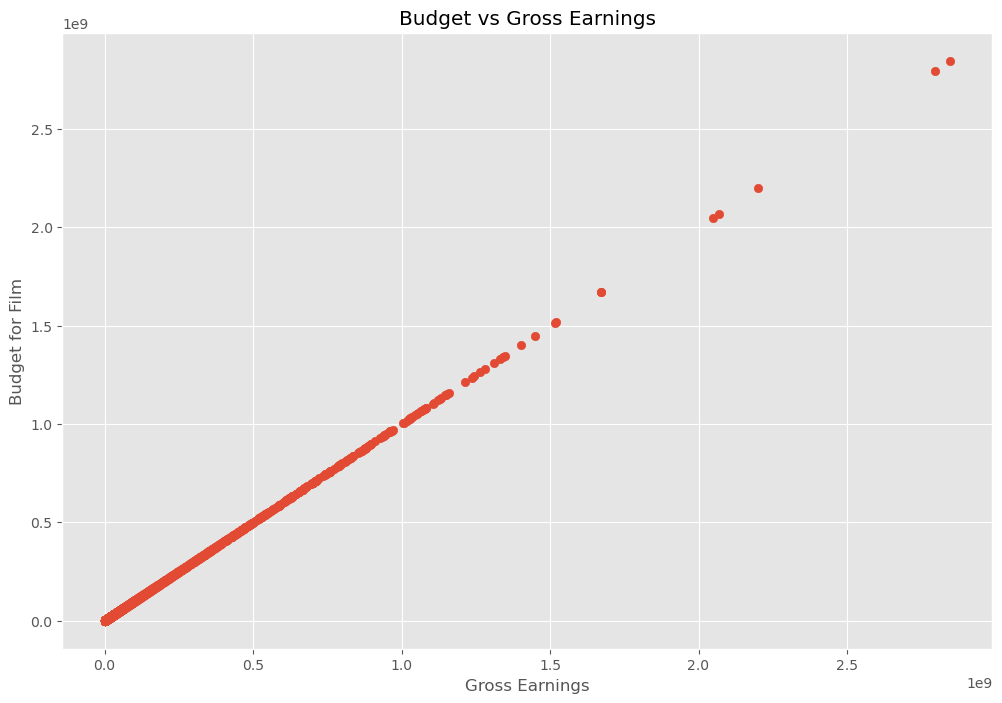

In [44]:
#building scatter plot with budget vs gross rev

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

In [43]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country      budget  \
5445       James Cameron    Sam Worthington  United States  2847246203   
7445  Christopher Markus  Robert Downey Jr.  United States  2797501328   
3045       James Cameron  Leonardo DiCaprio  United States  2201647264   
6663     Lawrence Kasdan       Daisy Ridley  United States  2069521700   
7244  Christopher Markus  Robert Downey Jr.  United States  2048359754   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox      162         2009  
7445  2797501328         Marvel Studios      181         2019  
3045  2201647264  Twentieth Century Fox      194         1997  
6663  2069521700              Lucasfilm      138         2015  
7244  2048359754         Marvel Studios      149         2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

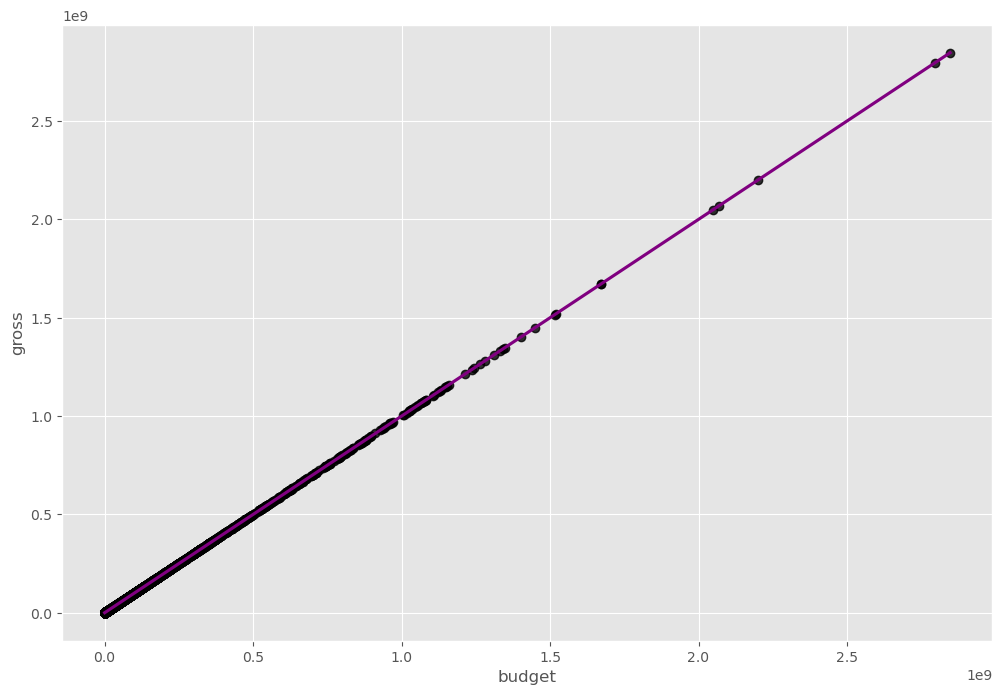

In [49]:
#regression plot - plotting budget vs gross using seaborn - line shows correlation 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "black"}, line_kws={"color": "purple"})

In [50]:
#looking at correlation

df.corr() #pearson correlation is what we are using, but there is also kendall and spearman

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.274321  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.222556  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.614751  0.614751  0.352303   
budget       0.274321  0.222556  0.614751  1.000000  1.000000  0.275796   
gross        0.274321  0.222556  0.614751  1.000000  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.275796  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.268721  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.268721  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [51]:
df.corr(method = 'kendall')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.039389  0.296512  0.239539  0.239539  0.064824   
score        0.039389  1.000000  0.350185  0.124943  0.124943  0.292254   
votes        0.296512  0.350185  1.000000  0.553625  0.553625  0.205344   
budget       0.239539  0.124943  0.553625  1.000000  1.000000  0.176979   
gross        0.239539  0.124943  0.553625  1.000000  1.000000  0.176979   
runtime      0.064824  0.292254  0.205344  0.176979  0.176979  1.000000   
yearcorrect  0.991304  0.043400  0.293044  0.232372  0.232372  0.064793   

             yearcorrect  
year            0.991304  
score           0.043400  
votes           0.293044  
budget          0.232372  
gross           0.232372  
runtime         0.064793  
yearcorrect     1.000000

In [52]:
df.corr(method = 'spearman')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.057741  0.427623  0.351045  0.351045  0.095444   
score        0.057741  1.000000  0.495409  0.183192  0.183192  0.412155   
votes        0.427623  0.495409  1.000000  0.745793  0.745793  0.300621   
budget       0.351045  0.183192  0.745793  1.000000  1.000000  0.257400   
gross        0.351045  0.183192  0.745793  1.000000  1.000000  0.257400   
runtime      0.095444  0.412155  0.300621  0.257400  0.257400  1.000000   
yearcorrect  0.998694  0.063674  0.422988  0.340529  0.340529  0.095507   

             yearcorrect  
year            0.998694  
score           0.063674  
votes           0.422988  
budget          0.340529  
gross           0.340529  
runtime         0.095507  
yearcorrect     1.000000

In [53]:
#high correlation between budget and gross

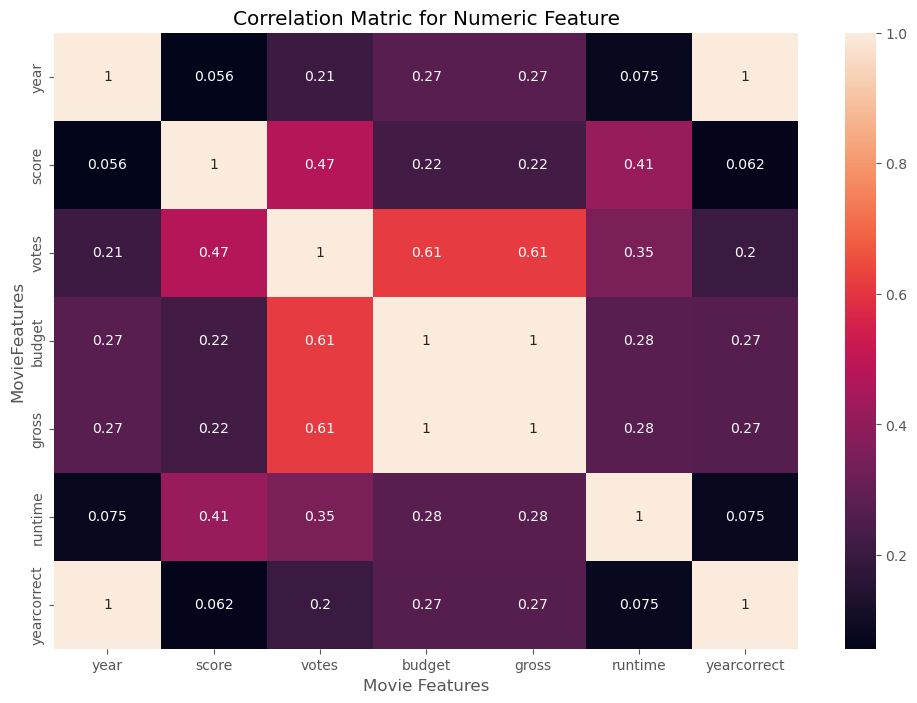

In [55]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('MovieFeatures')

plt.show()

In [57]:
#Looking at company - creating numeric representation for company name

df_numerized = df

#by doing all fields at once, we will be able to look at company and other non-numeric categories

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [ ]:
df.head

<bound method NDFrame.head of                                                    name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action  

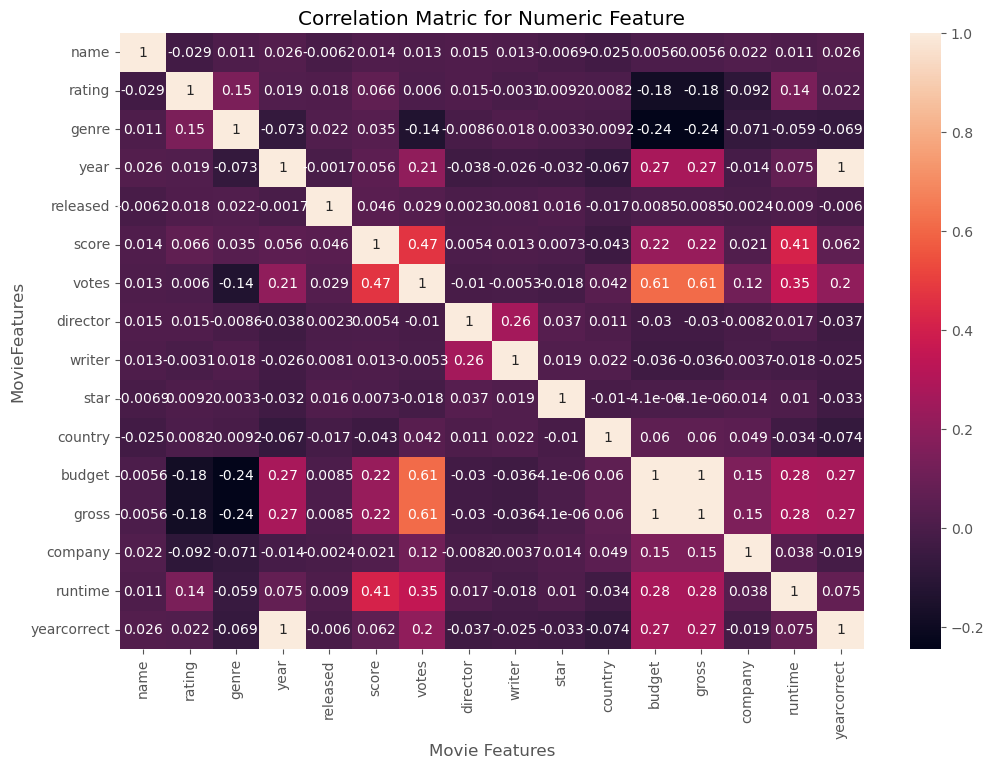

In [65]:
#Looking at correlation of every single column now that it has been numerized.

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Feature')
plt.xlabel('Movie Features')
plt.ylabel('MovieFeatures')

plt.show()

In [66]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.005639   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.181906   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.244101   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.274321   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.008501   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.222556   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.614751   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.029560   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.035885   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.000004   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.060078   
budget       0.614751 -0.029560 -0.035885 -0.000004  0.060078  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  1.000000   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.149553   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.275796   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.268721   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850     0.025542  
rating      -0.181906 -0.092357  0.140792     0.022021  
genre       -0.244101 -0.071334 -0.059237    -0.069147  
year         0.274321 -0.014333  0.075077     0.998726  
released     0.008501 -0.002407  0.008975    -0.005989  
score        0.222556  0.020656  0.414068     0.061923  
votes        0.614751  0.118470  0.352303     0.203098  
director    -0.029560 -0.008223  0.017433    -0.037371  
writer      -0.035885 -0.003697 -0.017561    -0.025495  
star        -0.000004  0.014082  0.010108    -0.032687  
country      0.060078  0.048569 -0.034477    -0.073569  
budget       1.000000  0.149553  0.275796     0.268721  
gross        1.000000  0.149553  0.275796     0.268721  
company      0.149553  1.000000  0.037585    -0.018806  
runtime      0.275796  0.037585  1.000000     0.075294  
yearcorrect  0.268721 -0.018806  0.075294     1.000000

In [67]:
#Unstacking

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.005639
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [68]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.244101
genre        budget        -0.244101
             gross         -0.244101
gross        genre         -0.244101
rating       gross         -0.181906
budget       rating        -0.181906
rating       budget        -0.181906
gross        rating        -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
country      year          -0.066748
year         country       -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
director     year          -0.038354
y

In [70]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
             budget         0.614751
budget       votes          0.614751
yearcorrect  year           0.998726
year         yearcorrect    0.998726
name         name           1.000000
company      company        1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
runtime      runtime        1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          1.000000
gross        budget         1.000000
             gross          1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# gross to budget has high correlation, budget to votes has high correlation, gross to votes has high correlation

